Akil Bhuiyan <br>
Professor Matthew Fried <br>
CSCI 381 (Data Analytics) <br>
Quiz 4

## **Introduction**

Data Sets:

The data set comprises 2,381 observations of 1 response/dependent variable (which indicates whether or not a mortgage application was denied) and 12 explanatory/independent variables. There are integers, floats and object data types. 

<br>

Data Attributes:

dir - debt payment to total income ratio

hir - house expense to income ratio

lvr - ratio of size of loan to assessed value of property

ccs - consumer credit score from 1 to 6 (a low value being a good score)


mcs - mortgage credit score from 1 to 4 (a low value being a good score)

pbcr - public bad credit score

dmi - denied mortagage insurance

self - self employed

single - is the applicant single

uria - 1989 Massachusetts unemployment rate in the applicant's industry

condominium - is unit a condominium

black - is the applicant black

deny - mortgage application denied

<br>

The dataset provides detailed information about the lender, the borrower, the loan, and the property. It contains the borrowers’ income, sex, race and ethnicity, among other characteristics. It details whether the mortgage was secured through conventional means or insured by the government, the reason the mortgage is being sought, the size of the loan, etc. It lists information about the property that’s being purchased, like the number of units and its general location 

In [2]:
# All Imports
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

In [3]:
csvv = 'https://raw.githubusercontent.com/iakil/CSCI381_DataAnalytics/main/Data/HDMABostonHousingData.csv'
df = pd.read_csv (csvv)
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [39]:
df.shape

(2381, 14)

In [40]:
df.dtypes

Unnamed: 0       int64
dir            float64
hir            float64
lvr            float64
ccs            float64
mcs            float64
pbcr            object
dmi             object
self            object
single          object
uria           float64
comdominiom      int64
black           object
deny            object
dtype: object

In [41]:
df.isnull().sum()

Unnamed: 0     0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [42]:
df.tail

<bound method NDFrame.tail of       Unnamed: 0       dir       hir       lvr       ccs       mcs pbcr dmi  \
0              1  0.221000  0.221000  0.800000  5.000000  2.000000   no  no   
1              2  0.265000  0.265000  0.921875  2.000000  2.000000   no  no   
2              3  0.372000  0.248000  0.920398  1.000000  2.000000   no  no   
3              4  0.320000  0.250000  0.860465  1.000000  2.000000   no  no   
4              5  0.360000  0.350000  0.600000  1.000000  1.000000   no  no   
...          ...       ...       ...       ...       ...       ...  ...  ..   
2376        2377  0.300000  0.300000  0.777049  1.000000  2.000000   no  no   
2377        2378  0.260000  0.200000  0.526761  2.000000  1.000000   no  no   
2378        2379  0.320000  0.260000  0.753846  6.000000  1.000000  yes  no   
2379        2380  0.350000  0.260000  0.813559  2.000000  2.000000   no  no   
2380        2381  0.330814  0.255346  0.700783  2.116387  1.721008  NaN  no   

     self single     

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2381 non-null   int64  
 1   dir          2381 non-null   float64
 2   hir          2381 non-null   float64
 3   lvr          2381 non-null   float64
 4   ccs          2381 non-null   float64
 5   mcs          2381 non-null   float64
 6   pbcr         2380 non-null   object 
 7   dmi          2381 non-null   object 
 8   self         2380 non-null   object 
 9   single       2381 non-null   object 
 10  uria         2381 non-null   float64
 11  comdominiom  2381 non-null   int64  
 12  black        2381 non-null   object 
 13  deny         2381 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 260.5+ KB


In [44]:
df.nunique()

Unnamed: 0     2381
dir             520
hir             501
lvr            1538
ccs               7
mcs               5
pbcr              2
dmi               2
self              2
single            2
uria             11
comdominiom       2
black             2
deny              2
dtype: int64

## **Exploratory Data Analysis**

In [45]:
df.describe()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


Lenders, such as banks and credit card companies, use credit scores to evaluate the risk of lending money to consumers.

1 - no "slow pay" or delinquent accounts, but sufficient references for determination

2 - one or two "slow pay" account(s) (each with one or two payments 30 days past due)

3 - more than two "slow pay" accounts (each with one or two payments 30 days past due); or one or two chronic "slow pay" account(s) (with three or more payments 30 days past due in any 12-month period)

4 Insufficient credit history or references for determination

5 - delinquent credit history (containing account(s) with a history of payments 60 days past due)

6 - serious delinquencies (containing account(s) with a history of payments 90 days past due)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'dir'}>,
        <AxesSubplot:title={'center':'hir'}>],
       [<AxesSubplot:title={'center':'lvr'}>,
        <AxesSubplot:title={'center':'ccs'}>,
        <AxesSubplot:title={'center':'mcs'}>],
       [<AxesSubplot:title={'center':'uria'}>,
        <AxesSubplot:title={'center':'comdominiom'}>, <AxesSubplot:>]],
      dtype=object)

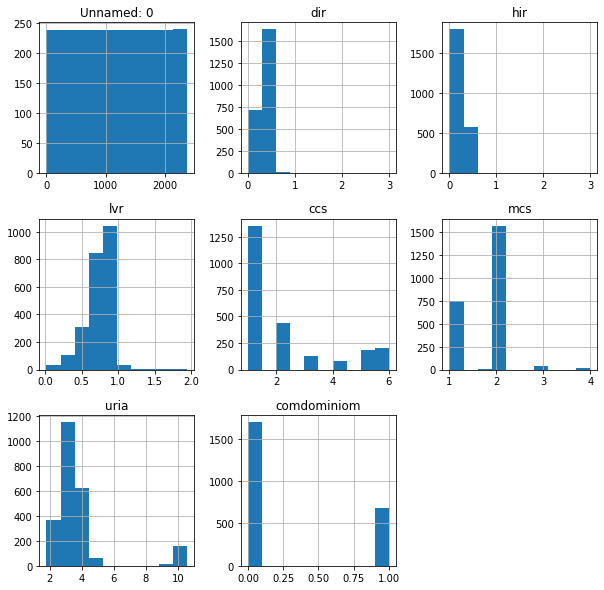

In [46]:
df.hist(figsize=(10,10))

Text(0, 0.5, 'number')

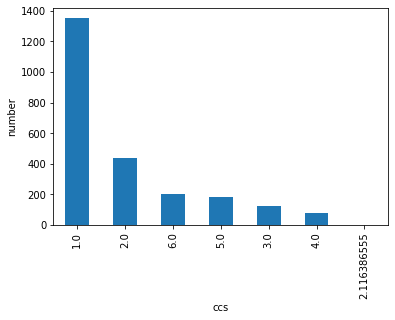

In [47]:
plt = df.ccs.value_counts().plot(kind= 'bar')
plt.set_xlabel('ccs')
plt.set_ylabel('number')

Text(0, 0.5, 'number')

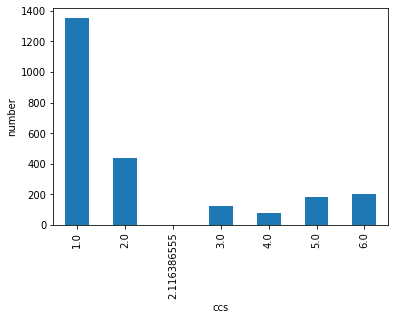

In [48]:
plt = df.ccs.value_counts().sort_index().plot(kind= 'bar')
plt.set_xlabel('ccs')
plt.set_ylabel('number')

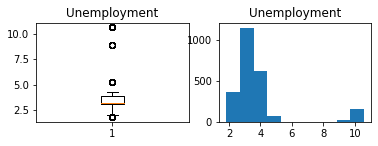

In [50]:
unEmp = df['uria']
import matplotlib.pyplot as plt
plt.subplot(221)
plt.boxplot(x=unEmp)
plt.title('Unemployment')
plt.subplot(222)
plt.hist(tuple(unEmp))
plt.title('Unemployment')
plt.show()

In [51]:
dfg=df
dfg.fillna(method='ffill',inplace=True)

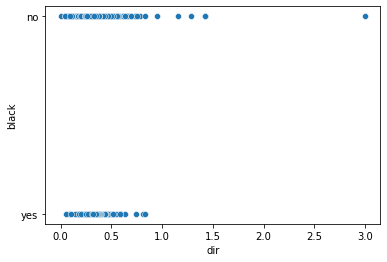

In [52]:
sns.scatterplot(x='dir', y='black', data=dfg);

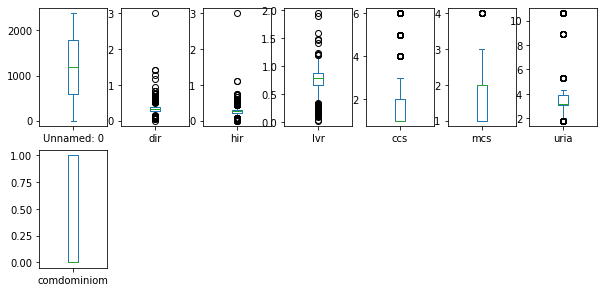

In [53]:
dfg.plot(kind='box', subplots=True, layout=(4,7), figsize=(10,10), sharex=False, sharey=False)
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 720x720 with 0 Axes>

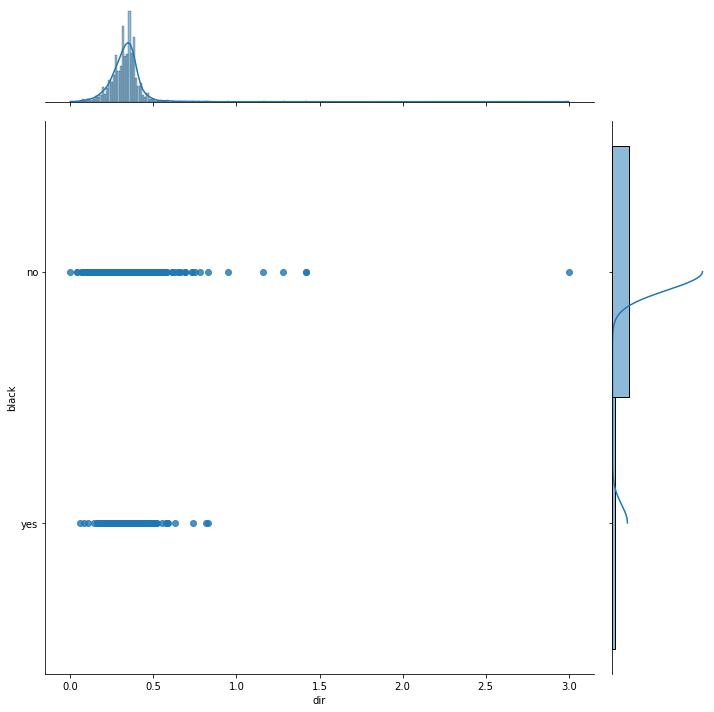

In [56]:
plt.figure (figsize=(10,10))
sns.jointplot(x = 'dir', y = 'black', data = df, kind = 'reg', height = 10)

My analysis shows that, even when accounting for debt-to-income and combined loan-to-value ratios in addition to other financial characteristics, lenders were still more likely to deny people of color home loans than White applicants. Applicants’ credit scores are still not released publicly, though lenders are required to report them to the federal government as part of their Home Mortgage Disclosure Act (HMDA) reporting.

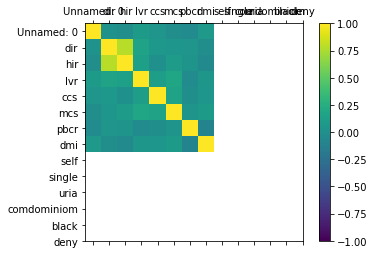

In [57]:
correlations = dfg.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dfg)
ax.set_yticklabels(dfg)
plt.show()

<AxesSubplot:>

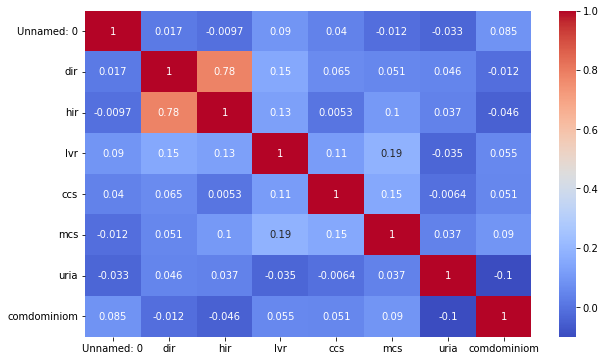

In [58]:
corr= df.corr()
plt.figure (figsize=(10,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

## **Data Preparation**

In [59]:
df1 = df
df1.fillna(method='ffill',inplace=True)
df1.isnull().sum()

Unnamed: 0     0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [60]:
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,dir,hir,lvr,ccs,mcs,uria,comdominiom
Unnamed: 0,1.000000,0.017261,-0.009741,0.089842,0.040050,-0.011960,-0.032517,0.085297
dir,0.017261,1.000000,0.781473,0.150653,0.065234,0.051318,0.046450,-0.012451
hir,-0.009741,0.781473,1.000000,0.126273,0.005277,0.104721,0.036992,-0.046039
lvr,0.089842,0.150653,0.126273,1.000000,0.111939,0.186326,-0.034643,0.055001
ccs,0.040050,0.065234,0.005277,0.111939,1.000000,0.152686,-0.006424,0.050742
mcs,-0.011960,0.051318,0.104721,0.186326,0.152686,1.000000,0.037077,0.090462
uria,-0.032517,0.046450,0.036992,-0.034643,-0.006424,0.037077,1.000000,-0.100647
comdominiom,0.085297,-0.012451,-0.046039,0.055001,0.050742,0.090462,-0.100647,1.000000


In [61]:
df['dmi'] = df['dmi'].map({'yes':1 ,'no':0})
df['pbcr'] = df['pbcr'].map({'yes':1 ,'no':0})
df['single'] = df['single'].map({'yes':1 ,'no':0})
df['self'] = df['self'].map({'yes':1 ,'no':0})
df['black'] = df['black'].map({'yes':1 ,'no':0})
df['deny'] = df['deny'].map({'yes':1 ,'no':0})

## **Prepped Data Review**

In [62]:
dfpp = df
dfpp = dfpp.rename(columns={'dir':'DebtTOIncome', 'hir':"HousingToIncome", 'lvr':'LoanToPropertyValue', 'uria':'UnemploymentRate'})
dfpp.head()

,Unnamed: 0,DebtTOIncome,HousingToIncome,LoanToPropertyValue,ccs,mcs,pbcr,dmi,self,single,UnemploymentRate,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0
1,2,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0
2,3,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0
3,4,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0
4,5,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0


## **Regression Modeling**

In [63]:
X = df1.drop('deny', 1)
y = df1['deny']
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,y)
feature_score = pd.DataFrame()
for i in range(X.shape[1]):
  new = pd.DataFrame({'Features':X.columns[i], 'Scores':fit.scores_[i]}, index=[i])
  feature_score = pd.concat([feature_score, new])
feature_score

/var/folders/l4/3jrpbdxs1d3d0d9grx88k7s00000gn/T/ipykernel_30949/3236059522.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df1.drop('deny', 1)


,Features,Scores
0,Unnamed: 0,294.328253
1,dir,3.287311
2,hir,1.541329
3,lvr,2.712354
4,ccs,214.943471
5,mcs,4.797375
6,pbcr,164.363471
7,dmi,289.338892
8,self,5.651809
9,single,8.426248


In [64]:
df1.deny.value_counts()

0    2096
1     285
Name: deny, dtype: int64

In [65]:
df1.dmi.value_counts()

0    2333
1      48
Name: dmi, dtype: int64

In [ ]:
rfe_output = pd.DataFrame({'Features':features.columns,'Rank':rfe.ranking_}).sort_values(by = 'Rank')
print(rfe_output)

In [68]:
df1.black.value_counts()

0    2042
1     339
Name: black, dtype: int64

In [ ]:
res = pd.DataFrame({'Chosen':features.columns[features_kbest]})
print(res)

In [70]:
target = df['deny']
features = df.drop('deny', axis=1).copy()
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=5, step=1)
rfe.fit(features, target)
rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['dir', 'lvr', 'pbcr', 'dmi', 'black'], dtype='object')


In [71]:
feature_names = list(features.columns)
selection_kBest = SelectKBest(f_regression, k=5).fit(features, target)
features_kbest = selection_kBest.get_support()
print('Chosen Features: ', features.columns[features_kbest], '\n')
selection_kBest.scores_

Chosen Features:  Index(['dir', 'ccs', 'pbcr', 'dmi', 'black'], dtype='object') 



array([  0.74161184,  98.44180896,  42.88743288,  64.31953539,
       175.85967302,  28.94913233, 191.52316913, 336.81573745,
         6.40773209,  13.96378611,   4.52958742,   3.75069692,
       104.58732528])

## **Select Models**

<Figure size 720x720 with 0 Axes>

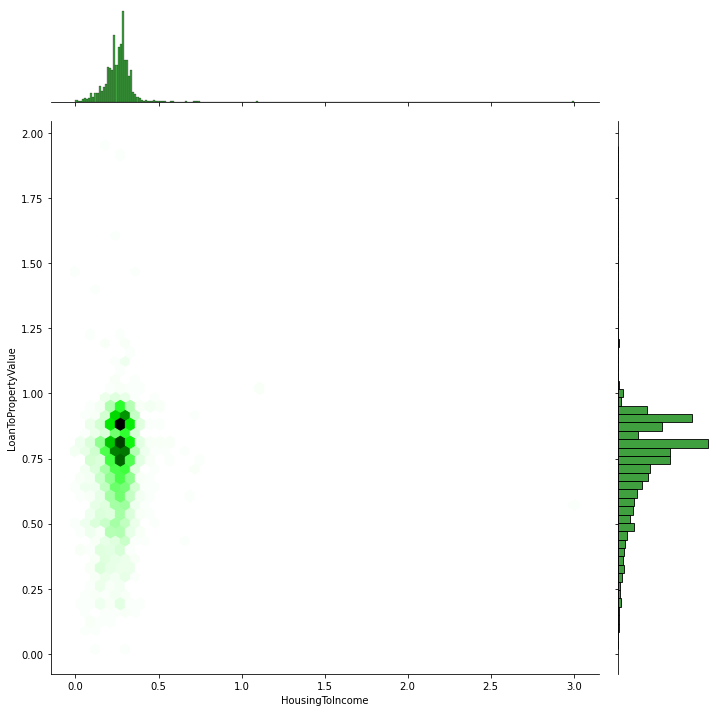

In [72]:
plt.figure (figsize=(10,10))
sns.jointplot(x = 'HousingToIncome', y = 'LoanToPropertyValue', data = dfpp, kind = 'hex', color = 'green', height = 10)

HMDA data is loan-level data containing many details of individual mortgage applications. We downloaded the 2019 dataset multiple times (as it is updated from time to time), most recently on Aug. 10, 2021. It contained more than 17 million applications, nearly 90 percent of all loans made in the country from more than 5,500 financial institutions. Smaller lenders are not required to report the applications they receive. Of those financial institutions that report their data, some don’t have to disclose the new fields required by the Dodd-Frank Act.

## **Conclusion**

Based on our analysis, our graph provides evidence that there is an effect of being African American on the probability of a mortgage application denial: in all specifications, the effect is estimated to be positive (ranging from 4% to  5%) and is significantly different from zero at the  1%
level. In this dataset, the most important features are ccs,pbcr, and dmi because those features determine if a person gets mortgage or not. Each feature is not related, most are independent features. If one feature's value is increased other features will not increase or decrease.b logistic regression model is best fit for this data set because it gives higher accuracy over other models. While the linear probability model seems to slightly overestimate this effect, it still can be used as an approximation to an intrinsically nonlinear relationship.

## **References**

[Quiz4](https://drive.google.com/open?id=1IbrRyH30lHypq6By_wKmCtrsh2cBL3YE) 

https://scikit-learn.org

https://realpython.com/tutorials/data-science/

https://en.wikipedia.org/wiki/Exploratory_data_analysis
